# In this notebook we will check multi collinearity,encode the categorical variables and perform Scaling, model building and model Evaluation

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, 
    plot_roc_curve, 
    precision_recall_curve,
    plot_precision_recall_curve,
    average_precision_score,
    auc
)
# for feature engineering
from feature_engine import encoding as ce
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn import svm

In [2]:
data = pd.read_csv('clean_data_reassesment.csv')
print(data.shape)
df = data.copy()

(4424, 38)


In [3]:
data.head()

,Unnamed: 0,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group
0,0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
1,1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,17-30
2,2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
3,3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,17-30
4,4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,41-50


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.head()

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,17-30
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,17-30
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,41-50


We will check the collinearity among the variables by using Heat map. 

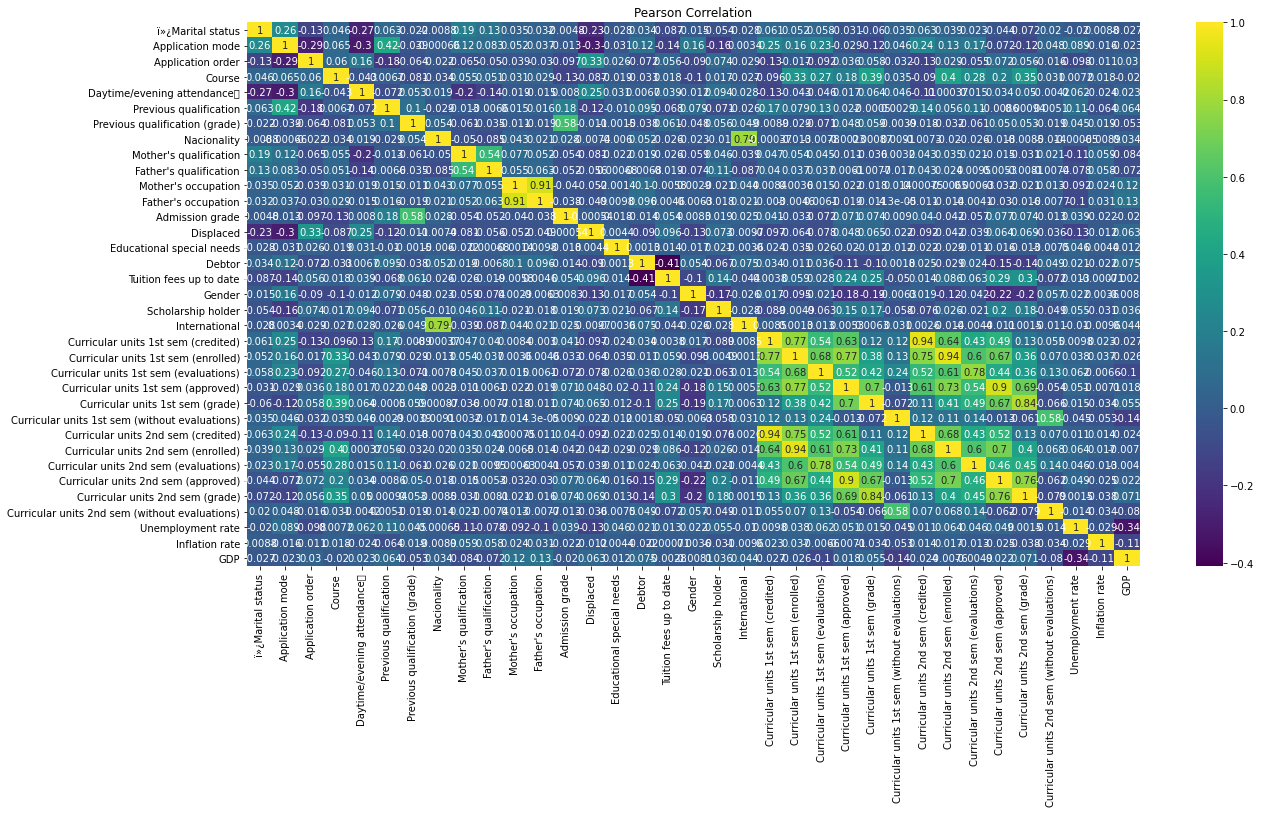

In [6]:
#visualize the correlation
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

From the above we can see that Curricular Unit 2nd sem (credited),Curricular Unit 1st sem(credited),Curricular Unit 2nd sem (enrolled),Curricular Unit 1st sem(enrolled),Curricular Unit 2nd sem (approved),Curricular Unit 1st sem(approved),Curricular Unit 1st sem(grade),Curricular Unit 2nd sem (grade) are highly correlated.
As classification predictive modelling is not impacted by multi-collinearity,we will proceed with all the columns.

# Categorical encoding 

In [7]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O' and var != 'Target']
num_vars = [var for var in data.columns if data[var].dtype != 'O' and var != 'Target']

print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical variables: {}'.format(len(num_vars)))

The number of categorical variables: 1
The number of numerical variables: 35


In [8]:
# how many labels are in each category?
for cat in cat_vars:
    print(cat, 'has {} labels'.format(data[cat].nunique()))
    print(data[cat].unique())
    print()

age_group has 5 labels
['17-30' '41-50' '31-40' '51-60' '>60']



In [9]:
cat_few = [cat for cat in cat_vars if data[cat].nunique() < 4]
cat_many = [cat for cat in cat_vars if cat not in cat_few]

print('Few categories',cat_few)
print('Many categories', cat_many)

Few categories []
Many categories ['age_group']


We will use ordinal and label encoder to encode age group and target variables variable
1. Age group 
2. Target - Dropout,Graduate,Enrolled

In [10]:
objList = data.select_dtypes(include = "object").columns
print (objList)

le = preprocessing.LabelEncoder()
for feat in objList:
    data[feat] = le.fit_transform(df[feat].astype(str))

Index(['Target', 'age_group'], dtype='object')


In [11]:
data['age_group'] = le.fit_transform(df['age_group'].astype(str))

In [12]:
data.head()

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2,2


# We will split the data 

In [13]:
X=data.drop(columns='Target').values
y=data['Target'].values

In [14]:
# Training,test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% training and 20% test

One hot Encoding would be bad choice as the categories have many features.One-hot encoding will create curse of dimensionality and tree based ensemble will have worst performance. Ordinal Encoding will establish relationship between the features.

 As we can see from EDA,with the increasing age group we have more number of drop outs.Hence we will use ordinal encoding for age group.

# Feature Scaling

Feature scaling is important because similar scales help machine learning models decrease the time to learn data. Also, some machine learning models (e.g. linear models, SVM) are sensitive to the scale of the variable.

We will use the StandardScaler method,as this is preferred when the data doesn't have gaussian distribution.

In [15]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
# transform train and test set
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# Model Building

 1. Model building with default parameters.
 
 Classfication Model : Classification using random forest classifier and without hyperparameter tuning
 
 We will use Stratified Cross validation

In [16]:
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [17]:
def standard_random_forest_function(X_train,y_train,X_test,y_test):
    #Create a Gaussian Classifier with the tuned parameters
    clf_bf_rd=RandomForestClassifier()
    clf_bf_rd.fit(X_train,y_train)
# Predict the response on the train data
    y_pred_train = clf_bf_rd.predict(X_train)
   # y_pred_train = np.argmax(y_pred_train_1, axis=0)
#Predict the response for test dataset created from the data
    y_pred_test = clf_bf_rd.predict(X_test)
    #y_pred_test = np.argmax(y_pred_test_1, axis=0)
    print("Accuracy of the Random Forest Model on a train data:",accuracy_score(y_train, y_pred_train))
    print("Accuracy of the Random Forest Model on a test data:",accuracy_score(y_test, y_pred_test))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
    print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))


# Evaluate the Random Forest Model using K-fold cross validation 
    rd_scores = cross_val_score(clf_bf_rd, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=-1)
# report performance
    print('The mean Accuracy of Random Forest Model using stratified cross validation is : %.3f (%.3f)' % (np.mean(rd_scores), np.std(rd_scores)))

In [18]:
standard_random_forest_function(X_train,y_train,X_test,y_test)

Accuracy of the Random Forest Model on a train data: 1.0
Accuracy of the Random Forest Model on a test data: 0.7785310734463277
Confusion Matrix  [[243  28  45]
 [ 33  52  66]
 [ 10  14 394]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       316
           1       0.55      0.34      0.42       151
           2       0.78      0.94      0.85       418

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.77      0.78      0.76       885

The mean Accuracy of Random Forest Model using stratified cross validation is : 0.773 (0.021)


Random forest shows over-fitting, and we can solve this problem by tuning the hyperparamters using Grid CV

In [19]:
#Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(2,30),
    'random_state' :[42]
}

# Instantiate the grid search model
grid_search_rd = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search_rd.fit(X_train,y_train)

print("The best parameters are : ", grid_search_rd.best_estimator_)
print("Cross-validated best score of Random Forest Model {}%".format(round(grid_search_rd.best_score_ * 100,3)))

Fitting 30 folds for each of 252 candidates, totalling 7560 fits
The best parameters are :  RandomForestClassifier(max_depth=21, n_estimators=500, random_state=42)
Cross-validated best score of Random Forest Model 77.894%


Random forest on tuned paramters

In [24]:
def random_forest_tuned_function(X_train,y_train,X_test,y_test):
    #Create a Gaussian Classifier with the tuned parameters
    clf_bf_rd=RandomForestClassifier(max_depth=21, n_estimators=500, random_state=42)
    clf_bf_rd.fit(X_train,y_train)
# Predict the response on the train data
    y_pred_train = clf_bf_rd.predict(X_train)
#Predict the response for test dataset created from the data
    y_pred_test = clf_bf_rd.predict(X_test)
    print("Accuracy of the Random Forest Model on a train data:",accuracy_score(y_train, y_pred_train))
    print("Accuracy of the Random Forest Model on a test data:",accuracy_score(y_test, y_pred_test))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
    print('Confusion Matrix ' , confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))


# Evaluate the Random Forest Model using K-fold cross validation 
    rd_scores = cross_val_score(clf_bf_rd, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=-1)
# report performance
    print('The mean Accuracy of Random Forest Model using stratified fold cross validation is : %.3f (%.3f)' % (np.mean(rd_scores), np.std(rd_scores)))

In [25]:
random_forest_tuned_function(X_train,y_train,X_test,y_test)

Accuracy of the Random Forest Model on a train data: 1.0
Accuracy of the Random Forest Model on a test data: 0.7694915254237288
Confusion Matrix  [[239  28  49]
 [ 35  50  66]
 [  8  18 392]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       316
           1       0.52      0.33      0.40       151
           2       0.77      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.76      0.77      0.75       885

The mean Accuracy of Random Forest Model using stratified fold cross validation is : 0.779 (0.019)


Other Supervised learning Techniques

1. Logistic Regression
2. SVC

1.1 . Building Logistic regression on Default parameters

In [27]:
clf_bf_lr = LogisticRegression()
clf_bf_lr.fit(X_train, y_train)
y_pred_lr = clf_bf_lr.predict(X_test)
print("Accuracy of the Logistic Regression Model on a test data:",metrics.accuracy_score(y_test, y_pred_lr))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
cm = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix ' , cm)
print(classification_report(y_test, y_pred_lr))

# Evaluate the Logistic Regression Model using K-fold cross validation 
log_scores = cross_val_score(clf_bf_lr, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance of LR
print('Accuracy of the Logistic Regression Model using K-fold cross validation is : %.3f (%.3f)' % (np.mean(log_scores), np.std(log_scores)))

Accuracy of the Logistic Regression Model on a test data: 0.7401129943502824
Confusion Matrix  [[236  32  48]
 [ 39  37  75]
 [ 12  24 382]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       316
           1       0.40      0.25      0.30       151
           2       0.76      0.91      0.83       418

    accuracy                           0.74       885
   macro avg       0.66      0.64      0.64       885
weighted avg       0.72      0.74      0.72       885

Accuracy of the Logistic Regression Model using K-fold cross validation is : 0.770 (0.017)


1.2 Hyper-parameter tuning of LR Model

In [28]:
# Create the parameter grid based on the results of random search 
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty' : ['l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
              'random_state': [42]
             }

# Instantiate the grid search model
grid_search_LR = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search_LR.fit(X_train, y_train)

print("The best parameters are : ", grid_search_LR.best_estimator_)
print("Cross-validated best score {}%".format(round(grid_search_LR.best_score_ * 100,3)))

Fitting 30 folds for each of 15 candidates, totalling 450 fits
The best parameters are :  LogisticRegression(C=10, random_state=42, solver='newton-cg')
Cross-validated best score 76.971%


1.3 Building LR Model on tuned hyperparameters

In [30]:
clf_af_lr = LogisticRegression(C= 10, penalty = 'l2', random_state = 42, solver = 'newton-cg')
clf_af_lr.fit(X_train, y_train)
y_pred_lr = clf_af_lr.predict(X_test)
print("Accuracy of the Logistic Regression Model on a test data:",metrics.accuracy_score(y_test, y_pred_lr))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
cm = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix ' , cm)
print(classification_report(y_test, y_pred_lr))

# Evaluate the Logistic Regression Model using K-fold cross validation 
log_scores = cross_val_score(clf_af_lr, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance of LR
print('Accuracy of the Logistic Regression Model using K-fold cross validation is : %.3f (%.3f)' % (np.mean(log_scores), np.std(log_scores)))

Accuracy of the Logistic Regression Model on a test data: 0.7412429378531074
Confusion Matrix  [[237  33  46]
 [ 39  37  75]
 [ 12  24 382]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       316
           1       0.39      0.25      0.30       151
           2       0.76      0.91      0.83       418

    accuracy                           0.74       885
   macro avg       0.66      0.64      0.64       885
weighted avg       0.72      0.74      0.72       885

Accuracy of the Logistic Regression Model using K-fold cross validation is : 0.770 (0.017)


2. SUPPORT VECTOR CLASSIFIER

2.1 Building SVC on default paramters

In [35]:
clf_bf_svm = svm.SVC()
clf_bf_svm.fit(X_train,y_train)
#Predict the response for test dataset created from the data
y_pred_svm = clf_bf_svm.predict(X_test)
print("Accuracy of the SVM  on a test data:",metrics.accuracy_score(y_test, y_pred_svm))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix ' , cm)
print(classification_report(y_test, y_pred_svm))


# Evaluate the SVM Model using K-fold cross validation 
svm_scores = cross_val_score(clf_bf_svm, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=-1)
# report performance
print('Accuracy of SVM Model is : %.3f (%.3f)' % (np.mean(svm_scores), np.std(svm_scores)))

Accuracy of the SVM  on a test data: 0.752542372881356
Confusion Matrix  [[227  36  53]
 [ 25  46  80]
 [  7  18 393]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       316
           1       0.46      0.30      0.37       151
           2       0.75      0.94      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.66       885
weighted avg       0.74      0.75      0.74       885

Accuracy of SVM Model is : 0.758 (0.018)


2.2 Hyper-parameter Tuning of SVM

In [37]:
# Create the parameter grid based on the results of random search 
params_svc = {'kernel': ['poly', 'rbf', 'sigmoid'],
              'C' : [50, 10, 1.0, 0.1, 0.01],
              'gamma' : ['scale'],
             'random_state': [42]
             }
# Instantiate the grid search model
grid_search_svm = GridSearchCV(estimator=svm.SVC(), 
                           param_grid=params_svc, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search_svm.fit(X_train,y_train)

print("The best parameters are : ", grid_search_svm.best_estimator_)
print("Cross-validated best score {}%".format(round(grid_search_svm.best_score_ * 100,3)))

Fitting 30 folds for each of 15 candidates, totalling 450 fits
The best parameters are :  SVC(random_state=42)
Cross-validated best score 75.756%


2.3 Building a SVM Classifier on tuned hyper-parameters

In [39]:
# create model based on the tuned hyper-parameters
clf_af_svm = svm.SVC(C=50, kernel='poly', random_state=42)
clf_af_svm.fit(X_train,y_train)
#Predict the response for test dataset created from the data
y_pred_svm = clf_af_svm.predict(X_test)
print("Accuracy of the SVM  on a test data:",metrics.accuracy_score(y_test, y_pred_svm))
# Create the Confusion Matrix to understand Sensitivity,Specificity,Accuracy
cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix ' , cm)
print(classification_report(y_test, y_pred_svm))


# Evaluate the SVM Model using K-fold cross validation 
svm_scores = cross_val_score(clf_af_svm, X_train,y_train, cv=cv,scoring='accuracy',n_jobs=-1)
# report performance
print('Accuracy of SVM Model is : %.3f (%.3f)' % (np.mean(svm_scores), np.std(svm_scores)))

Accuracy of the SVM  on a test data: 0.7016949152542373
Confusion Matrix  [[216  58  42]
 [ 34  43  74]
 [ 25  31 362]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       316
           1       0.33      0.28      0.30       151
           2       0.76      0.87      0.81       418

    accuracy                           0.70       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.69      0.70      0.69       885

Accuracy of SVM Model is : 0.714 (0.023)


From the above models we can see that Random Forest Classifier does a better job in terms oof accuracy of 77.9%